<a href="https://colab.research.google.com/github/rohan2RS/movie_recommendation_system-AIML/blob/main/Movie_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd


In [2]:
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')

In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [5]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
print(movies.shape)
print(tags.shape)
print(ratings.shape)

(9742, 3)
(3683, 4)
(100836, 4)


In [7]:
movies.isnull().sum()

,0
movieId,0
title,0
genres,0


In [8]:
tags.isnull().sum()

,0
userId,0
movieId,0
tag,0
timestamp,0


In [9]:
ratings.isnull().sum()

,0
userId,0
movieId,0
rating,0
timestamp,0


In [10]:
movies.duplicated().sum()
ratings.duplicated().sum()
tags.duplicated().sum()

0

In [11]:
final_dataset = ratings.pivot(index='movieId', columns='userId', values='rating')

In [12]:
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
final_dataset.fillna(0, inplace=True)

In [14]:
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
no_user_voted = ratings.groupby('movieId')['rating'].agg('count')
no_movies_voted = ratings.groupby('userId')['rating'].agg('count')

In [16]:
no_movies_voted

,rating
userId,
1,232
2,29
3,39
4,216
5,44
...,...
606,1115
607,187
608,831


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

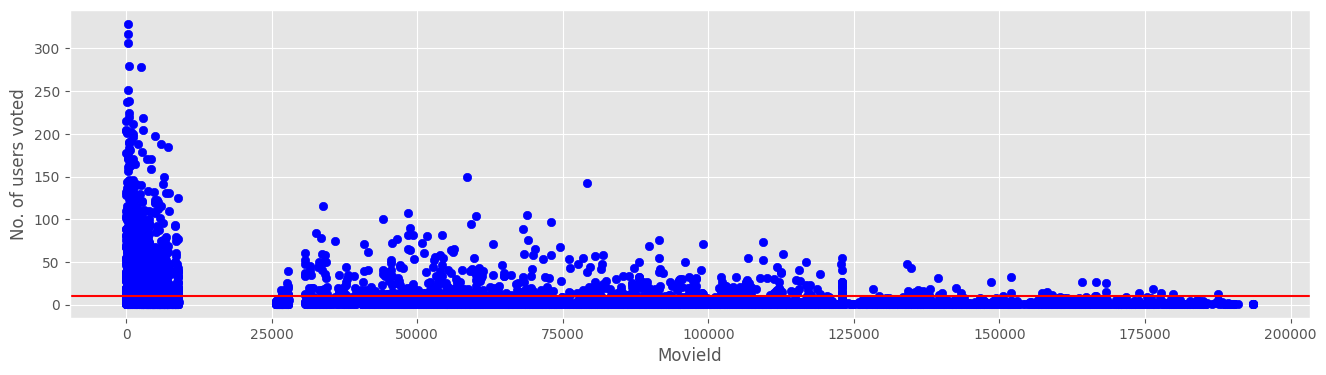

In [18]:
plt.style.use('ggplot')
fig,plt.axis = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_user_voted.index, no_user_voted, color='blue')
plt.axhline(y=10, color='r')
plt.xlabel('MovieId')
plt.ylabel('No. of users voted')
plt.show()


In [19]:
final_dataset = final_dataset.loc[no_user_voted[no_user_voted > 10].index,:]

In [20]:
final_dataset

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
176371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


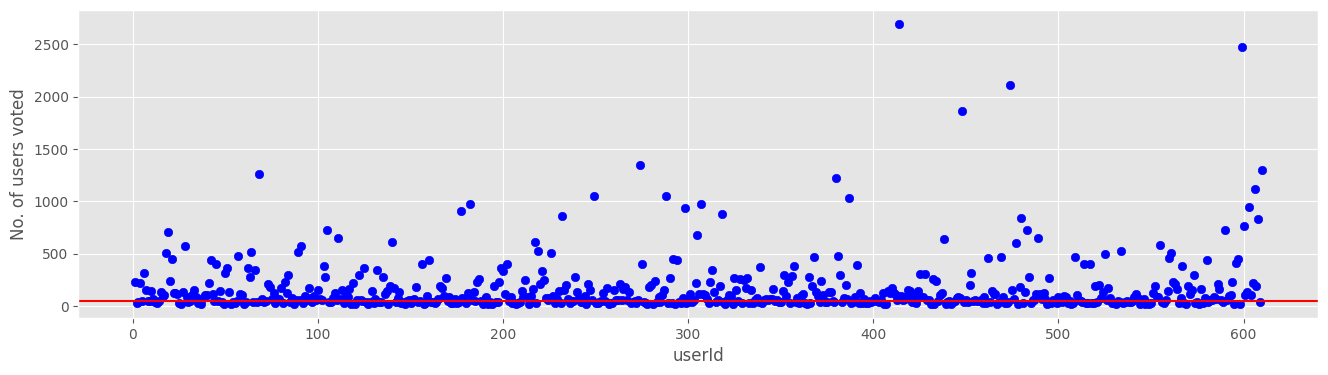

In [21]:
plt.style.use('ggplot')
fig,plt.axis = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_movies_voted.index, no_movies_voted, color='blue')
plt.axhline(y=50, color='r')
plt.xlabel('userId')
plt.ylabel('No. of users voted')
plt.show()

In [22]:
final_dataset = final_dataset.loc[:, no_movies_voted[no_movies_voted > 50].index]

In [23]:
final_dataset.head()

userId,1,4,6,7,10,11,15,16,17,18,...,600,601,602,603,604,605,606,607,608,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,4.5,0.0,0.0,2.5,0.0,4.5,3.5,...,2.5,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,5.0
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,4.0,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0
3,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,4.0,...,0.0,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,5.0


In [24]:
from scipy.sparse import csr_matrix

In [25]:
sample = np.array([[1,0,0,0,0],[0,0,2,0,0],[0,4,0,0,0]])
sparsity = 1.0 - (np.count_nonzero(sample) / float(sample.size ))
print(sparsity)

0.8


In [26]:
csr_sample = csr_matrix(sample)
print(csr_sample)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 3 stored elements and shape (3, 5)>
  Coords	Values
  (0, 0)	1
  (1, 2)	2
  (2, 1)	4


In [27]:
csr_data = csr_matrix(final_dataset.values)
final_dataset.reset_index(inplace=True)

In [28]:
csr_data

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 72893 stored elements and shape (2121, 378)>

In [29]:
from sklearn.neighbors import NearestNeighbors

In [30]:
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [31]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [32]:
def get_recommendations(movie_name):
    n_movies_to_reccomend = 10
    # Make the search case-insensitive
    movie_list = movies[movies['title'].str.contains(movie_name, case=False)]

    if len(movie_list):
        # Continue with the rest of your logic
        movie_idx = movie_list.iloc[0]['movieId']
        movie_idx_in_final_dataset = final_dataset[final_dataset['movieId'] == movie_idx].index[0]
        distances, indices = knn.kneighbors(csr_data[movie_idx_in_final_dataset], n_neighbors=n_movies_to_reccomend+1)
        sorteded_indices = sorted(list(zip(indices.squeeze().tolist(), distances.squeeze().tolist())), key=lambda x: x[1])[:0:-1]

        recommend_frame = []
        for val in sorteded_indices:
            movie_idx = final_dataset.iloc[val[0]]['movieId']
            idx = movies[movies['movieId'] == movie_idx].index
            recommend_frame.append({'Title': movies.iloc[idx]['title'].values[0], 'Distance': val[1]})
        df = pd.DataFrame(recommend_frame, index=range(1, n_movies_to_reccomend+1))
        return df
    else:
        return "Movie Not Found"

In [33]:
get_recommendations('Toy Story')

,Title,Distance
1,Groundhog Day (1993),0.399495
2,"Lion King, The (1994)",0.398578
3,Pulp Fiction (1994),0.398293
4,Star Wars: Episode VI - Return of the Jedi (1983),0.390663
5,Apollo 13 (1995),0.384633
6,Shrek (2001),0.381472
7,Star Wars: Episode IV - A New Hope (1977),0.380789
8,Toy Story 2 (1999),0.371637
9,Forrest Gump (1994),0.356542
10,Jurassic Park (1993),0.334884


In [34]:
!pip install streamlit==1.23.0
!pip install mlem==0.4.0 # Optional, based on your deployment preference

  Using cached mlem-0.4.0-py3-none-any.whl.metadata (17 kB)
  Using cached isort-6.0.1-py3-none-any.whl.metadata (11 kB)
  Using cached pydantic-1.10.22-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (154 kB)
  Using cached click-8.1.8-py3-none-any.whl.metadata (2.3 kB)
  Using cached aiohttp_swagger-1.0.16-py3-none-any.whl.metadata (2.1 kB)
  Using cached cached_property-2.0.1-py3-none-any.whl.metadata (10 kB)
  Using cached python_gitlab-6.0.0-py3-none-any.whl.metadata (8.5 kB)
  Using cached flatdict-4.0.1.tar.gz (8.3 kB)
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.4/205.4 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 61.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 63.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━

In [35]:
!npm install localtunnel

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴
added 22 packages in 3s
⠴
⠴3 packages are looking for funding
⠴  run `npm fund` for details
⠴

In [37]:
!streamlit run app.py & npx localtunnel --port 8501

⠙your url is: https://grumpy-paths-travel.loca.lt



  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.16.184.13:8501

  Stopping...
^C
